In [22]:
# preparing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime

In [23]:
# import the data
df = pd.read_csv('C:\\Users\\Bahauddin\\Downloads\\flight_delay.csv')

In [24]:
df.head()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0


In [25]:
df = pd.read_csv('C:\\Users\\Bahauddin\\Downloads\\flight_delay.csv')
df['departure_airport'] = df['Depature Airport']
df['destination_airport'] = df['Destination Airport']
df['Destination Airport']
del df['Depature Airport']
df.head(11)

,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,departure_airport,destination_airport
0,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,SVO,HAV
1,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,SVO,JFK
2,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,SVO,MIA
3,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,SVO,LAX
4,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,OTP,SVO
5,2015-10-27 14:30:00,SVO,2015-10-27 17:15:00,0.0,HAM,SVO
6,2015-10-27 14:35:00,JFK,2015-10-28 01:25:00,0.0,SVO,JFK
7,2015-10-27 15:40:00,SVO,2015-10-27 21:20:00,1.0,DXB,SVO
8,2015-10-27 16:10:00,VVO,2015-10-28 00:35:00,0.0,SVO,VVO
9,2015-10-27 16:45:00,SVO,2015-10-27 20:55:00,0.0,TLV,SVO


In [26]:
# split by date and time
df[['departure_date', 'departure_time']] = df['Scheduled depature time'].str.split(' ', expand=True)
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['departure_dayofweek'] = df['departure_date'].dt.dayofweek

df[['arrival_date', 'arrival_time']] = df['Scheduled arrival time'].str.split(' ', expand=True)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_dayofweek'] = df['departure_date'].dt.dayofweek

df['timedate_departure'] = pd.to_datetime(df['Scheduled depature time'])
df['timedate_arrival'] = pd.to_datetime(df['Scheduled arrival time'])
df['flight_duration'] = df['timedate_arrival'] - df['timedate_departure']
df['flight_duration'] = pd.to_numeric(df['flight_duration'] // (6*10**10))

df.head().T

,0,1,2,3,4
Scheduled depature time,2015-10-27 07:40:00,2015-10-27 09:50:00,2015-10-27 10:45:00,2015-10-27 12:30:00,2015-10-27 14:15:00
Destination Airport,HAV,JFK,MIA,LAX,SVO
Scheduled arrival time,2015-10-27 20:45:00,2015-10-27 20:35:00,2015-10-27 23:35:00,2015-10-28 01:20:00,2015-10-27 16:40:00
Delay,0,2,0,0,9
departure_airport,SVO,SVO,SVO,SVO,OTP
destination_airport,HAV,JFK,MIA,LAX,SVO
departure_date,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00
departure_time,07:40:00,09:50:00,10:45:00,12:30:00,14:15:00
departure_dayofweek,1,1,1,1,1
arrival_date,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-28 00:00:00,2015-10-27 00:00:00


In [27]:
# calculating the flight duration columns
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'])
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'])
df['Flight Duration'] = (df['Scheduled arrival time'] - df['Scheduled depature time']).dt.total_seconds()/60
print(df.head(10))

  Scheduled depature time Destination Airport Scheduled arrival time  Delay  \
0     2015-10-27 07:40:00                 HAV    2015-10-27 20:45:00    0.0   
1     2015-10-27 09:50:00                 JFK    2015-10-27 20:35:00    2.0   
2     2015-10-27 10:45:00                 MIA    2015-10-27 23:35:00    0.0   
3     2015-10-27 12:30:00                 LAX    2015-10-28 01:20:00    0.0   
4     2015-10-27 14:15:00                 SVO    2015-10-27 16:40:00    9.0   
5     2015-10-27 14:30:00                 SVO    2015-10-27 17:15:00    0.0   
6     2015-10-27 14:35:00                 JFK    2015-10-28 01:25:00    0.0   
7     2015-10-27 15:40:00                 SVO    2015-10-27 21:20:00    1.0   
8     2015-10-27 16:10:00                 VVO    2015-10-28 00:35:00    0.0   
9     2015-10-27 16:45:00                 SVO    2015-10-27 20:55:00    0.0   

  departure_airport destination_airport departure_date departure_time  \
0               SVO                 HAV     2015-10-27   

In [28]:
#statistics about data, count, unique, top, freq
df.describe()

,Delay,departure_dayofweek,arrival_dayofweek,flight_duration,Flight Duration
count,675513.000000,675513.000000,675513.000000,675513.000000,675513.000000
mean,9.912939,3.009599,3.009599,196.035351,196.035351
std,44.895875,2.000378,2.000378,121.853260,121.853260
min,0.000000,0.000000,0.000000,45.000000,45.000000
25%,0.000000,1.000000,1.000000,120.000000,120.000000
50%,0.000000,3.000000,3.000000,160.000000,160.000000
75%,5.000000,5.000000,5.000000,225.000000,225.000000
max,1436.000000,6.000000,6.000000,1590.000000,1590.000000


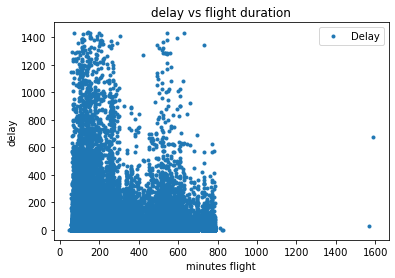

In [29]:
# visualize the data
df.plot(x='flight_duration', y='Delay', style='.')
plt.title('delay vs flight duration')
plt.xlabel('minutes flight')
plt.ylabel('delay')
plt.show()

In [30]:
X = df.drop(['Delay', 'Scheduled depature time',
                          'Scheduled arrival time', 'departure_date',
                          'departure_time', 'arrival_date', 'arrival_time',
                          'timedate_departure', 'timedate_arrival'], axis=1)
y = df.loc[:, ['Delay']]
X_train = X.loc[df['departure_date'].dt.year<2018]
y_train = y.loc[df['departure_date'].dt.year<2018]
X_test = X.loc[df['departure_date'].dt.year==2018]
y_test = y.loc[df['departure_date'].dt.year==2018]
X_test

,Destination Airport,departure_airport,destination_airport,departure_dayofweek,arrival_dayofweek,flight_duration,Flight Duration
499059,SVO,ATH,SVO,0,0,250,250.0
499060,SVO,LHR,SVO,0,0,215,215.0
499061,SVO,DXB,SVO,0,0,340,340.0
499062,SVO,TLV,SVO,0,0,250,250.0
499063,SVO,BEY,SVO,0,0,235,235.0
...,...,...,...,...,...,...,...
675508,SVX,SVO,SVX,4,4,140,140.0
675509,SVO,LED,SVO,4,4,80,80.0
675510,EGO,SVO,EGO,4,4,85,85.0
675511,TSE,SVO,TSE,4,4,200,200.0


In [31]:
#encode departure and detination airport
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = list(X_train.loc[:, ['departure_airport']].values.ravel())
label_encoder.fit(data)
X_train.loc[:, ['departure_airport']] = label_encoder.transform(X_train.loc[:, ['departure_airport']].values.ravel())

data = list(X_train.loc[:, ['destination_airport']].values.ravel())
label_encoder.fit(data)
X_train.loc[:, ['destination_airport']] = label_encoder.transform(X_train.loc[:, ['destination_airport']].values.ravel())

data = list(X_test.loc[:, ['departure_airport']].values.ravel())
label_encoder.fit(data)
X_test.loc[:, ['departure_airport']] = label_encoder.transform(X_test.loc[:, ['departure_airport']].values.ravel())

data = list(X_test.loc[:, ['destination_airport']].values.ravel())
label_encoder.fit(data)
X_test.loc[:, ['destination_airport']] = label_encoder.transform(X_test.loc[:, ['destination_airport']].values.ravel())

C:\Users\Bahauddin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
#Linear Regression
regressor = LinearRegression()
x_for_linear_regress = X_train['flight_duration'].values[:, np.newaxis]
y_for_linear_regress = y_train['Delay'].values[:, np.newaxis]

regressor.fit(x_for_linear_regress, y_for_linear_regress)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

x_test_for_linear_regress = X_test.loc[:, ['flight_duration']]
y_pred = regressor.predict(x_test_for_linear_regress)

pd.DataFrame({'Actual': y_test.values[:, 0], 'Predicted': y_pred[:, 0]}, index=[x for x in range(len(y_pred))])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R score', metrics.r2_score(y_test, y_pred))

Model intercept : [7.88648395]
Model coefficient : [[0.01647566]]
Mean Absolute Error: 14.40165184126641
Mean Squared Error: 1619.2068848222073
Root Mean Squared Error: 40.239369836295985
R score -0.010254266664184941


In [39]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [50]:

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_x_poly, y_train)
lasso_reg.score(train_x_poly, y_train)

C:\Users\Bahauddin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1520.982318460763, tolerance: 338.0152122184354
  model = cd_fast.enet_coordinate_descent(


0.09839620260818982

,Delay,departure_dayofweek,arrival_dayofweek,flight_duration,Flight Duration,month
count,675513.000000,675513.000000,675513.000000,675513.000000,675513.000000,675513.000000
mean,9.912939,3.009599,3.009599,196.035351,196.035351,6.389819
std,44.895875,2.000378,2.000378,121.853260,121.853260,3.389819
min,0.000000,0.000000,0.000000,45.000000,45.000000,1.000000
25%,0.000000,1.000000,1.000000,120.000000,120.000000,4.000000
50%,0.000000,3.000000,3.000000,160.000000,160.000000,6.000000
75%,5.000000,5.000000,5.000000,225.000000,225.000000,9.000000
max,1436.000000,6.000000,6.000000,1590.000000,1590.000000,12.000000


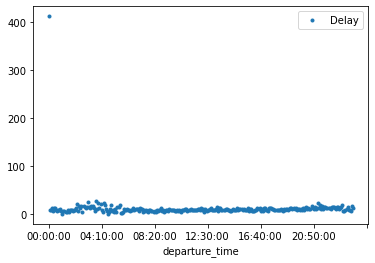

In [51]:
df['month'] = df['departure_date'].dt.month
new_data = df[['Delay', 'departure_time', 'flight_duration']].groupby(by=['departure_time']).mean()
new_data.plot(y='Delay', use_index=True, style='.')
new_data.shape
df.describe()

In [52]:
# Polynomial regression
new_data['departure_time'] = new_data.index
data = list(new_data.loc[:, ['departure_time']].values.ravel())
label_encoder.fit(data)
new_data.loc[:, ['departure_time']] = label_encoder.transform(new_data.loc[:, ['departure_time']].values.ravel())
new_data_X =new_data.drop('Delay', axis=1)
new_data_y = new_data.loc[:, ['Delay']]
X_train, X_test, y_train, y_test = train_test_split(new_data_X,new_data_y, test_size=0.2, random_state=431)

In [53]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_x_poly, y_train)
lasso_reg.score(train_x_poly, y_train)


C:\Users\Bahauddin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1520.982318460763, tolerance: 338.0152122184354
  model = cd_fast.enet_coordinate_descent(


0.09839620260818982

[[0.         0.00861488]]
[[ 0.00000000e+00  8.16963701e-04 -1.60092060e-04  7.23067780e-07]]
[[ 0.00000000e+00  1.68469557e-01 -2.73345392e-03  1.45061229e-05
  -2.38097672e-08]]


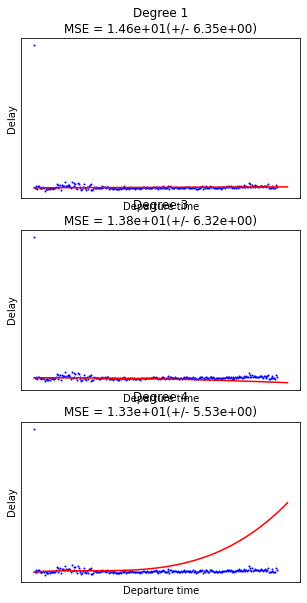

In [54]:

degrees = [1, 3, 4]
plt.figure(figsize=(5, 10))
for i in range(0, len(degrees)):
  ax = plt.subplot(len(degrees), 1, i + 1)
  plt.setp(ax, xticks=(), yticks=())

  poly = PolynomialFeatures(degree=degrees[i])
  train_x_poly = poly.fit_transform(X_train.loc[:, ['departure_time']])
  clf = LinearRegression()

  test_x_poly = poly.fit_transform(X_test.loc[:, ['departure_time']])
  train_y_ = clf.fit(train_x_poly, y_train)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(clf, train_x_poly, y_train,
                            scoring="neg_mean_squared_error", cv=10)
  plt.scatter(new_data_X['departure_time'], new_data_y['Delay'], color='blue', s=1)
  XX = np.arange(0, 300, 0.1)
  yy = clf.intercept_ + clf.coef_[0][1]*XX
  print(clf.coef_)
  for j in range(2, degrees[i]):
    yy += clf.coef_[0][j]*np.power(XX, j)
  plt.plot(XX, yy, '-r')
  plt.xlabel('Departure time')
  plt.ylabel('Delay')
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
      degrees[i], -scores.mean(), scores.std()))
